# Wallmart sales dataset   
https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import datetime

In [4]:
sales=pd.read_csv('./Reference/walmart-sales-dataset-of-45stores.csv')

In [5]:
sales.head()
sales.info()
sales.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

# Calculated fields

In [6]:
sales['Date']=pd.to_datetime(sales['Date'])
sales['Year']=sales['Date'].dt.year
sales['Month']=sales['Date'].dt.month
sales['Day']=sales['Date'].dt.day
sales['MonthYear_value'] = sales['Date'].dt.to_period('M')
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,2010-05


# EDA

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Store'}>],
       [<AxesSubplot:title={'center':'Holiday_Flag'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>]], dtype=object)

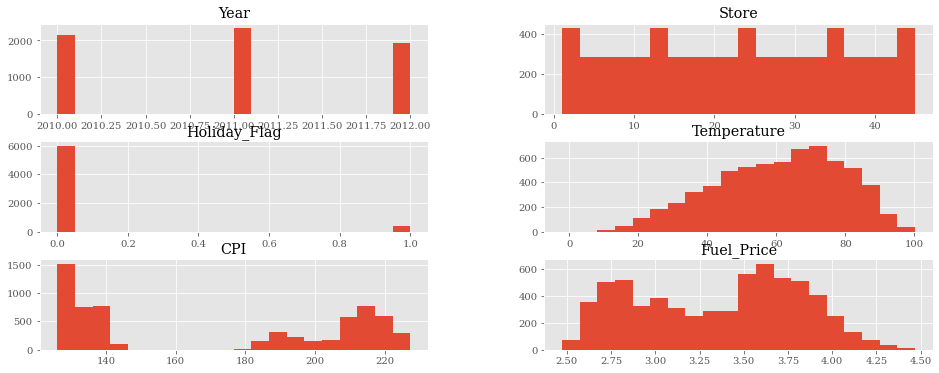

In [66]:
sales[['Year', 'Store', 'Holiday_Flag','Temperature','CPI','Fuel_Price']].hist(
 bins=20, figsize=(16, 6))

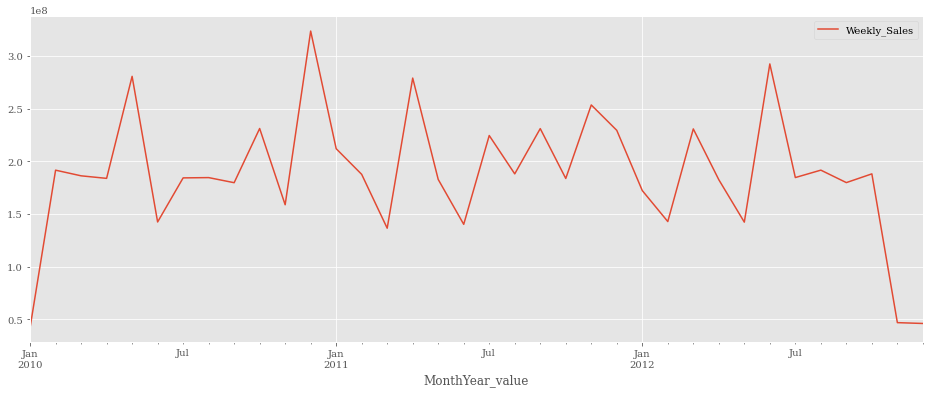

In [67]:
sales_year = sales.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(
 figsize=(16, 6), subplots=True);

# Insight 1 : As unemployment increases sales decreases

In [21]:
print("The correlation coefficient  between Weekly_Sales and Holiday_Flag is :",np.corrcoef(sales['Weekly_Sales'],sales['Unemployment'])[0,1])

The correlation coefficient  between Weekly_Sales and Holiday_Flag is : -0.10617608965795419


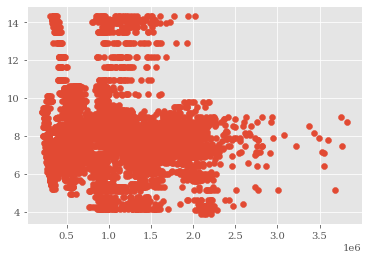

In [55]:
%matplotlib inline
matplotlib.style.use('ggplot')
plt.scatter(sales['Weekly_Sales'],sales['Unemployment'])
plt.show()

# Insight 2 : December is all time highest sales season

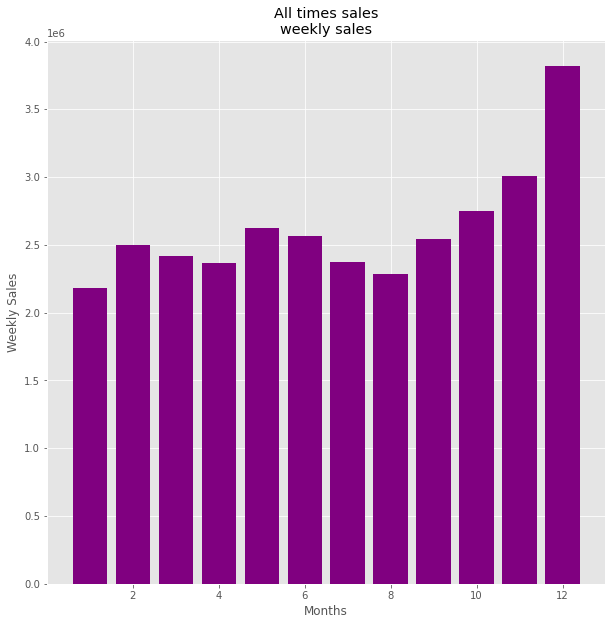

In [23]:
# Create figure and plot space
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 10))
# Add x-axis and y-axis
ax.bar(sales['Month'],
        sales['Weekly_Sales'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Months",
       ylabel="Weekly Sales",
       title="All times sales\nweekly sales")

plt.show()

### Insight 3 Sales is deteriorating over time 

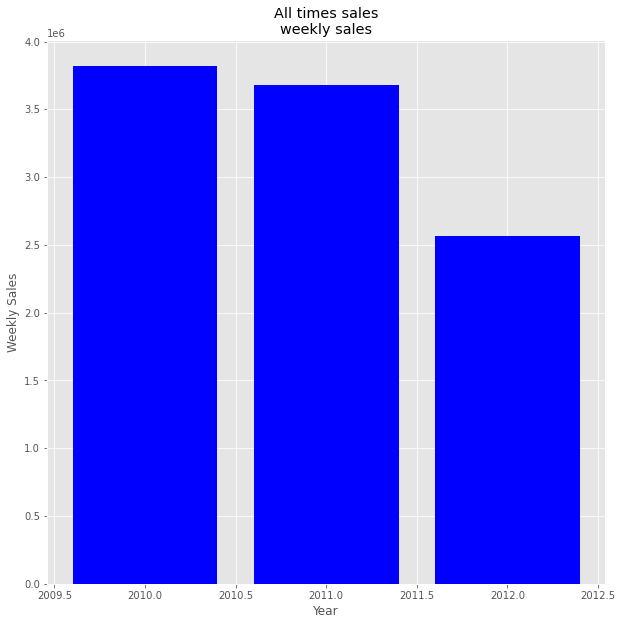

In [28]:
# Create figure and plot space
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 10))
# Add x-axis and y-axis
ax.bar(sales['Year'],
        sales['Weekly_Sales'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="Weekly Sales",
       title="All times sales\nweekly sales")

plt.show()

# Comparing Sales over years. Since oct 2012 real decline happend

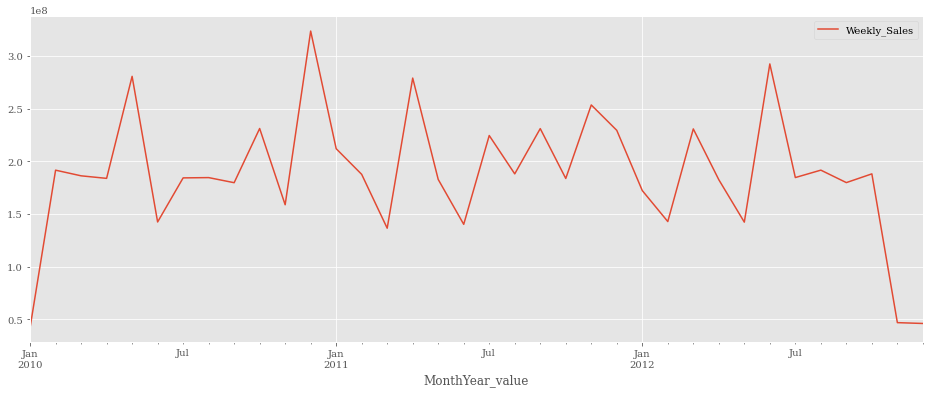

In [68]:
sales_year = sales.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(
 figsize=(16, 6), subplots=True);

In [31]:
sales['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [32]:
sales_2010=pd.DataFrame(sales[sales['Year']==2010])
sales_2011=pd.DataFrame(sales[sales['Year']==2011])
sales_2012=pd.DataFrame(sales[sales['Year']==2012])

# 2010 & 2011 looks similar as Q4 has the peaks in sales  but 2012 has peaks at Feb , June and  Oct (is it a quarter adjustment??)

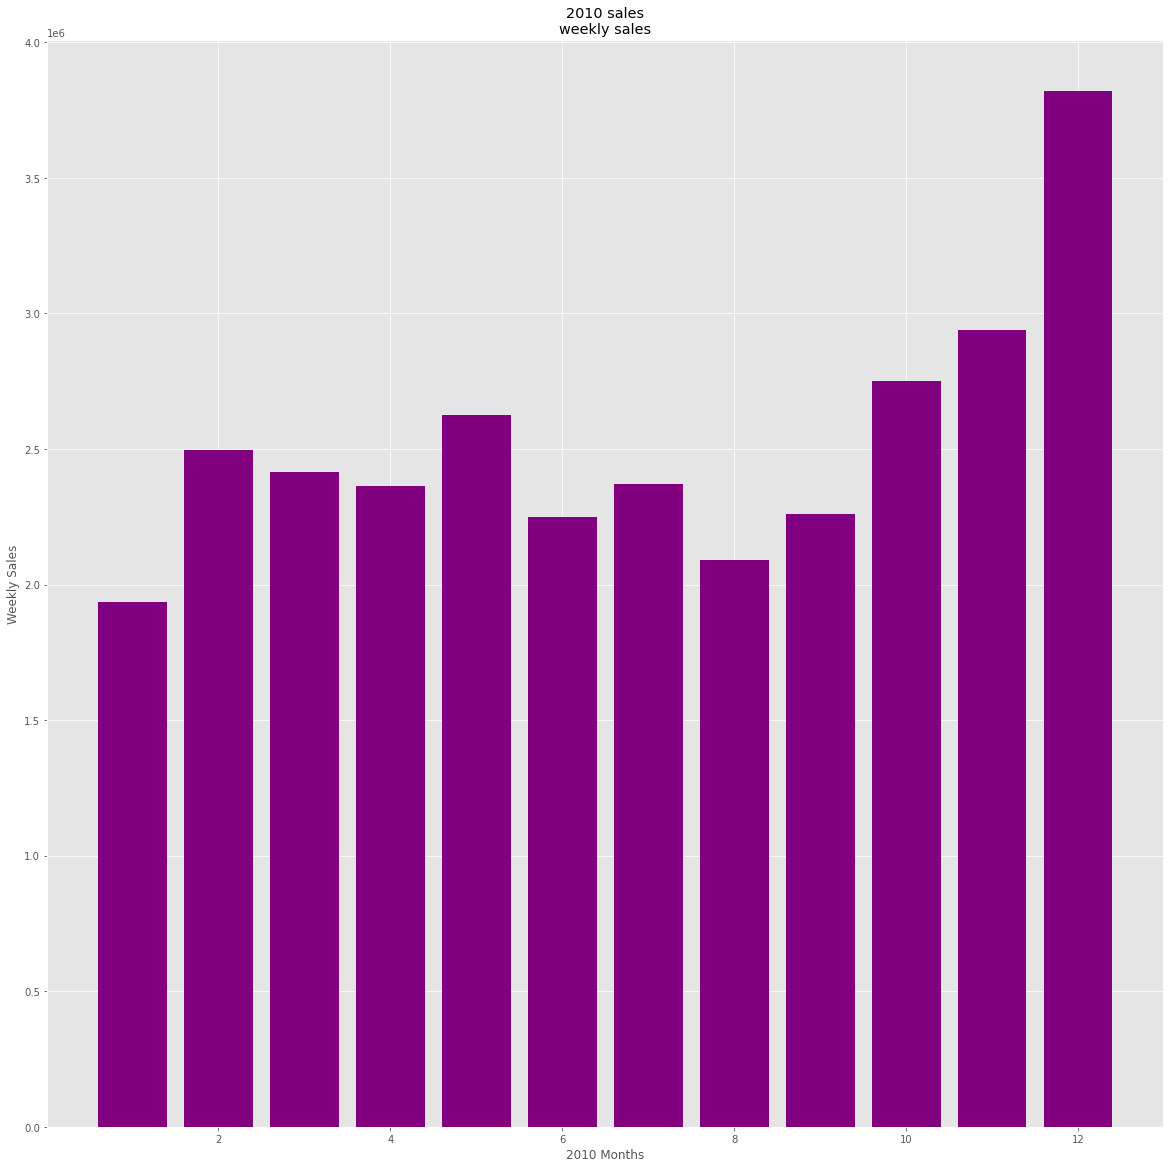

In [33]:
# Create figure and plot space
matplotlib.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 20))
# Add x-axis and y-axis
ax.bar(sales_2010['Month'],
        sales_2010['Weekly_Sales'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="2010 Months",
       ylabel="Weekly Sales",
       title="2010 sales\nweekly sales")
plt.show()

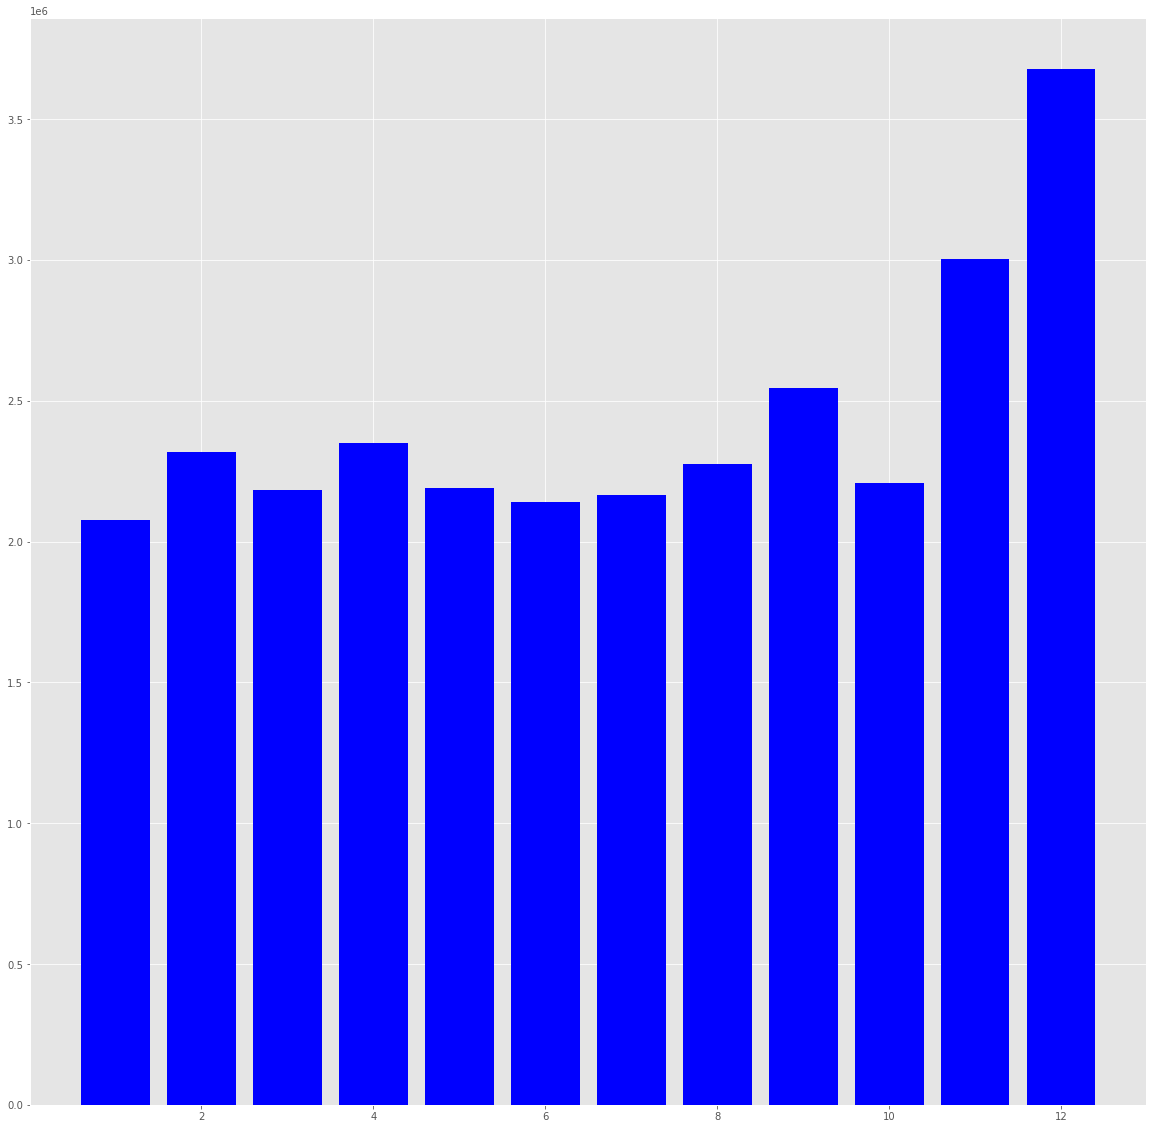

In [36]:
# Create figure and plot space
matplotlib.style.use('ggplot')
fig1, ax1 = plt.subplots(figsize=(20, 20))
# Add x-axis and y-axis
ax1.bar(sales_2011['Month'],
        sales_2011['Weekly_Sales'],
        color='blue')
plt.show()

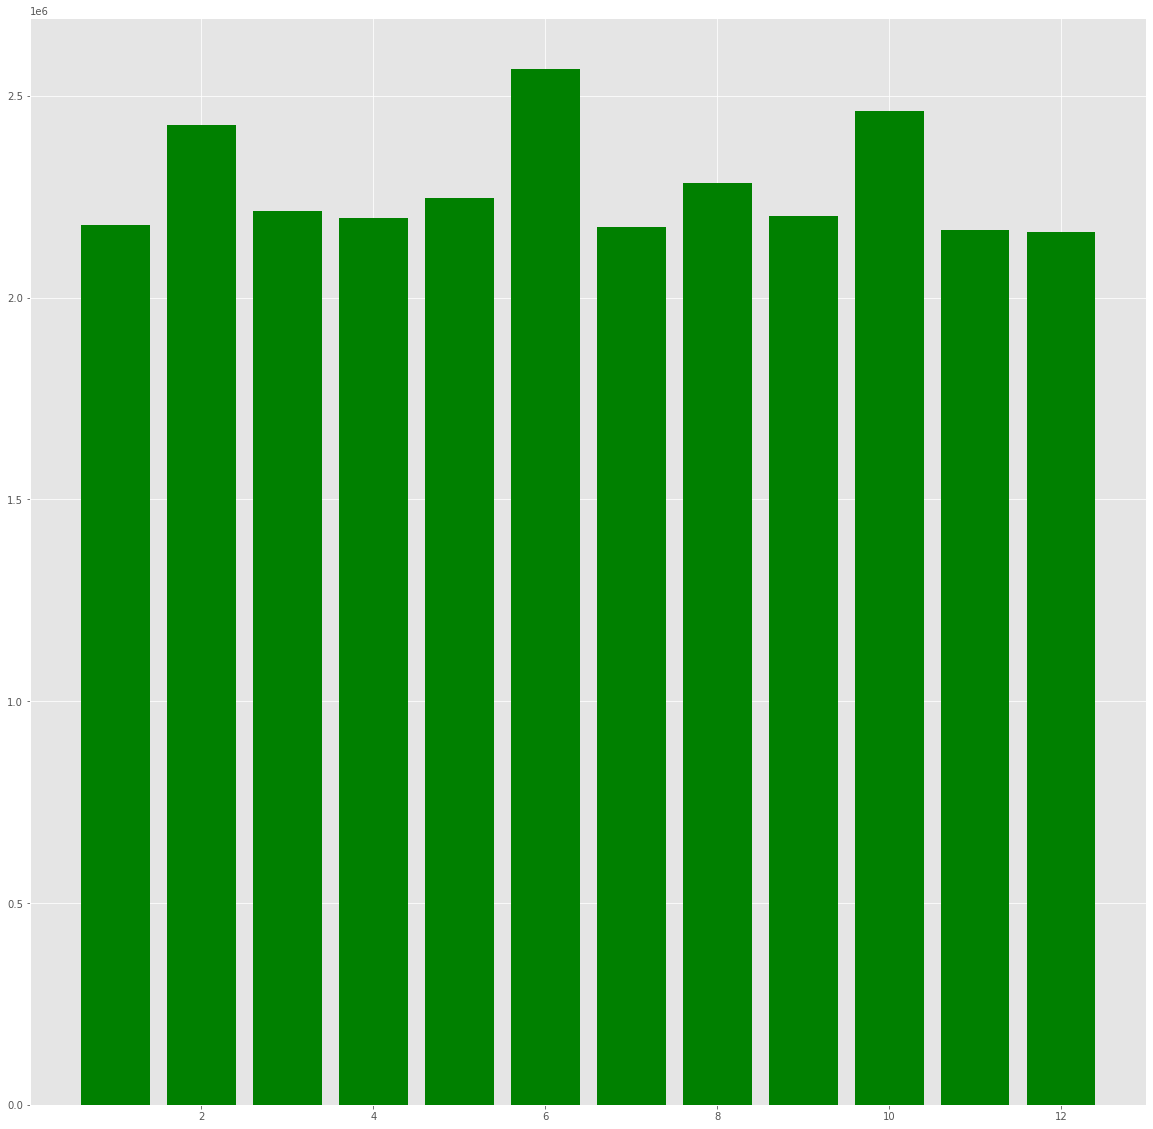

In [37]:
# Create figure and plot space

fig1, ax1 = plt.subplots(figsize=(20, 20))
# Add x-axis and y-axis
ax1.bar(sales_2012['Month'],
        sales_2012['Weekly_Sales'],
        color='green')
plt.show()